In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
train_data = pd.read_csv(r"./train.csv")
test_data = pd.read_csv(r"./test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Feature Engineering
def clean_nan_columns(data, columns):
    for column in columns:
        print("start clean ", column)
        nan_column = np.isnan(data[column])
        if len(nan_column[nan_column]) != 0:
            data = data[nan_column != True]
        print("finish clean ", column)
    return data


nan_columns = ["Age", "SibSp", "Parch"]

train_data = clean_nan_columns(train_data, nan_columns)
print(len(train_data))
test_data = clean_nan_columns(test_data, nan_columns)
print(len(test_data))

start clean  Age
finish clean  Age
start clean  SibSp
finish clean  SibSp
start clean  Parch
finish clean  Parch
714
start clean  Age
finish clean  Age
start clean  SibSp
finish clean  SibSp
start clean  Parch
finish clean  Parch
332


In [6]:
#keep test PassengerId for result csv
test_passenger_id = test_data["PassengerId"]

In [7]:
test_passenger_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [8]:
def drop_not_concerned_columns(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned_columns(train_data, not_concerned_columns)
test_data = drop_not_concerned_columns(test_data, not_concerned_columns)

In [9]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [10]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [11]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [12]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,0,0,1
1,1,female,38.0,1,0,1,0,0
2,1,female,26.0,0,0,0,0,1
3,1,female,35.0,1,0,1,0,0
4,0,male,35.0,0,0,0,0,1


In [13]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,male,34.5,0,0,0,0,1
1,female,47.0,1,0,0,0,1
2,male,62.0,0,0,0,1,0
3,male,27.0,0,0,0,0,1
4,female,22.0,1,1,0,0,1


In [14]:
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1


In [15]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1,0,0,0,1
1,1,0,0.472229,1,0,1,0,0
2,1,0,0.321438,0,0,0,0,1
3,1,0,0.434531,1,0,1,0,0
4,0,1,0.434531,0,0,0,0,1


In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("train_y content:{}".format(train_y[:3]))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))

train_x:(571, 7)
train_y:(571, 1)
train_y content:[[0]
 [0]
 [0]]
valid_x:(143, 7)
valid_y:(143, 1)


In [17]:
# Build Neural Network
from collections import namedtuple

def build_neural_network(hidden_units=5):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]], name="inputs")
    labels = tf.placeholder(tf.float32, shape=[None, 1], name="labels")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    fc = tf.layers.dense(inputs, hidden_units, activation=tf.nn.relu)
    logits = tf.layers.dense(fc, 1, activation=None, name="logits")
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy, name="cost")

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost, name="optimizer")

    predicted = tf.nn.sigmoid(logits, name="predicted")
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name="accuracy")

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

In [19]:
epochs = 12000
train_print = 250
valid_print = 500
learning_rate_value = 0.0001

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for e in range(epochs):
        feed = {model.inputs: train_x,
                model.labels: train_y,
                model.learning_rate: learning_rate_value}

        train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
        if e % train_print == 0:
            print("Epoch: {}/{}".format(e + 1, epochs),
                  "Training Loss: {:.5f}".format(train_loss),
                  "Training Acc: {:.5f}".format(train_acc))
            x_collect.append(e)
            train_loss_collect.append(train_loss)
            train_acc_collect.append(train_acc)

            feed = {model.inputs: valid_x,
                    model.labels: valid_y}
            val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
            print("Epoch: {}/{}".format(e + 1, epochs),
                  "Validation Loss: {:.4f}".format(val_loss),
                  "Validation Acc: {:.4f}".format(val_acc))
            valid_loss_collect.append(val_loss)
            valid_acc_collect.append(val_acc)

    saver.save(sess, "./titanic.ckpt")

Epoch: 1/12000 Training Loss: 0.69057 Training Acc: 0.59545
Epoch: 1/12000 Validation Loss: 0.6999 Validation Acc: 0.5874


Epoch: 251/12000 Training Loss: 0.67869 Training Acc: 0.59370
Epoch: 251/12000 Validation Loss: 0.6872 Validation Acc: 0.5874


Epoch: 501/12000 Training Loss: 0.66797 Training Acc: 0.59545
Epoch: 501/12000 Validation Loss: 0.6754 Validation Acc: 0.5874


Epoch: 751/12000 Training Loss: 0.65773 Training Acc: 0.59545
Epoch: 751/12000 Validation Loss: 0.6640 Validation Acc: 0.5874


Epoch: 1001/12000 Training Loss: 0.64756 Training Acc: 0.59545
Epoch: 1001/12000 Validation Loss: 0.6524 Validation Acc: 0.5874


Epoch: 1251/12000 Training Loss: 0.63686 Training Acc: 0.60595
Epoch: 1251/12000 Validation Loss: 0.6396 Validation Acc: 0.5874


Epoch: 1501/12000 Training Loss: 0.62340 Training Acc: 0.63047
Epoch: 1501/12000 Validation Loss: 0.6241 Validation Acc: 0.6014


Epoch: 1751/12000 Training Loss: 0.60698 Training Acc: 0.67250
Epoch: 1751/12000 Validation Loss: 0.6047 Validation Acc: 0.6713


Epoch: 2001/12000 Training Loss: 0.59258 Training Acc: 0.72680
Epoch: 2001/12000 Validation Loss: 0.5867 Validation Acc: 0.7413


Epoch: 2251/12000 Training Loss: 0.57901 Training Acc: 0.76357
Epoch: 2251/12000 Validation Loss: 0.5695 Validation Acc: 0.7762


Epoch: 2501/12000 Training Loss: 0.56625 Training Acc: 0.77933
Epoch: 2501/12000 Validation Loss: 0.5533 Validation Acc: 0.8042


Epoch: 2751/12000 Training Loss: 0.55436 Training Acc: 0.78109
Epoch: 2751/12000 Validation Loss: 0.5380 Validation Acc: 0.8252


Epoch: 3001/12000 Training Loss: 0.54311 Training Acc: 0.77933
Epoch: 3001/12000 Validation Loss: 0.5237 Validation Acc: 0.8182


Epoch: 3251/12000 Training Loss: 0.53268 Training Acc: 0.78459
Epoch: 3251/12000 Validation Loss: 0.5111 Validation Acc: 0.8252


Epoch: 3501/12000 Training Loss: 0.52185 Training Acc: 0.78284
Epoch: 3501/12000 Validation Loss: 0.4983 Validation Acc: 0.8322


Epoch: 3751/12000 Training Loss: 0.51188 Training Acc: 0.78459
Epoch: 3751/12000 Validation Loss: 0.4870 Validation Acc: 0.8252


Epoch: 4001/12000 Training Loss: 0.50283 Training Acc: 0.78984
Epoch: 4001/12000 Validation Loss: 0.4776 Validation Acc: 0.8322


Epoch: 4251/12000 Training Loss: 0.49444 Training Acc: 0.78809
Epoch: 4251/12000 Validation Loss: 0.4691 Validation Acc: 0.8322


Epoch: 4501/12000 Training Loss: 0.48687 Training Acc: 0.78809
Epoch: 4501/12000 Validation Loss: 0.4620 Validation Acc: 0.8322


Epoch: 4751/12000 Training Loss: 0.48037 Training Acc: 0.79159
Epoch: 4751/12000 Validation Loss: 0.4558 Validation Acc: 0.8392


Epoch: 5001/12000 Training Loss: 0.47469 Training Acc: 0.80560
Epoch: 5001/12000 Validation Loss: 0.4505 Validation Acc: 0.8182


Epoch: 5251/12000 Training Loss: 0.46952 Training Acc: 0.80385
Epoch: 5251/12000 Validation Loss: 0.4462 Validation Acc: 0.8182


Epoch: 5501/12000 Training Loss: 0.46481 Training Acc: 0.80560
Epoch: 5501/12000 Validation Loss: 0.4423 Validation Acc: 0.8042


Epoch: 5751/12000 Training Loss: 0.46063 Training Acc: 0.80210
Epoch: 5751/12000 Validation Loss: 0.4392 Validation Acc: 0.8042


Epoch: 6001/12000 Training Loss: 0.45667 Training Acc: 0.80210
Epoch: 6001/12000 Validation Loss: 0.4360 Validation Acc: 0.8042


Epoch: 6251/12000 Training Loss: 0.45284 Training Acc: 0.80911
Epoch: 6251/12000 Validation Loss: 0.4327 Validation Acc: 0.8042


Epoch: 6501/12000 Training Loss: 0.44937 Training Acc: 0.80911
Epoch: 6501/12000 Validation Loss: 0.4299 Validation Acc: 0.8112


Epoch: 6751/12000 Training Loss: 0.44633 Training Acc: 0.81086
Epoch: 6751/12000 Validation Loss: 0.4276 Validation Acc: 0.8042


Epoch: 7001/12000 Training Loss: 0.44363 Training Acc: 0.80560
Epoch: 7001/12000 Validation Loss: 0.4255 Validation Acc: 0.8042


Epoch: 7251/12000 Training Loss: 0.44115 Training Acc: 0.81086
Epoch: 7251/12000 Validation Loss: 0.4237 Validation Acc: 0.8042


Epoch: 7501/12000 Training Loss: 0.43885 Training Acc: 0.81436
Epoch: 7501/12000 Validation Loss: 0.4219 Validation Acc: 0.8112


Epoch: 7751/12000 Training Loss: 0.43674 Training Acc: 0.81436
Epoch: 7751/12000 Validation Loss: 0.4204 Validation Acc: 0.8112


Epoch: 8001/12000 Training Loss: 0.43481 Training Acc: 0.82312
Epoch: 8001/12000 Validation Loss: 0.4190 Validation Acc: 0.8042


Epoch: 8251/12000 Training Loss: 0.43234 Training Acc: 0.82312
Epoch: 8251/12000 Validation Loss: 0.4170 Validation Acc: 0.8042


Epoch: 8501/12000 Training Loss: 0.43032 Training Acc: 0.81961
Epoch: 8501/12000 Validation Loss: 0.4156 Validation Acc: 0.8042


Epoch: 8751/12000 Training Loss: 0.42843 Training Acc: 0.81786
Epoch: 8751/12000 Validation Loss: 0.4144 Validation Acc: 0.8042


Epoch: 9001/12000 Training Loss: 0.42673 Training Acc: 0.81611
Epoch: 9001/12000 Validation Loss: 0.4141 Validation Acc: 0.8112


Epoch: 9251/12000 Training Loss: 0.42509 Training Acc: 0.81611
Epoch: 9251/12000 Validation Loss: 0.4137 Validation Acc: 0.8112


Epoch: 9501/12000 Training Loss: 0.42345 Training Acc: 0.81611
Epoch: 9501/12000 Validation Loss: 0.4142 Validation Acc: 0.8112


Epoch: 9751/12000 Training Loss: 0.42165 Training Acc: 0.81611
Epoch: 9751/12000 Validation Loss: 0.4139 Validation Acc: 0.8112


Epoch: 10001/12000 Training Loss: 0.41971 Training Acc: 0.81611
Epoch: 10001/12000 Validation Loss: 0.4125 Validation Acc: 0.8042


Epoch: 10251/12000 Training Loss: 0.41775 Training Acc: 0.81611
Epoch: 10251/12000 Validation Loss: 0.4138 Validation Acc: 0.8042


Epoch: 10501/12000 Training Loss: 0.41579 Training Acc: 0.81436
Epoch: 10501/12000 Validation Loss: 0.4158 Validation Acc: 0.8042


Epoch: 10751/12000 Training Loss: 0.41433 Training Acc: 0.81786
Epoch: 10751/12000 Validation Loss: 0.4158 Validation Acc: 0.8042


Epoch: 11001/12000 Training Loss: 0.41282 Training Acc: 0.82662
Epoch: 11001/12000 Validation Loss: 0.4159 Validation Acc: 0.8042


Epoch: 11251/12000 Training Loss: 0.41140 Training Acc: 0.82487
Epoch: 11251/12000 Validation Loss: 0.4155 Validation Acc: 0.8042


Epoch: 11501/12000 Training Loss: 0.41017 Training Acc: 0.82487
Epoch: 11501/12000 Validation Loss: 0.4154 Validation Acc: 0.7972


Epoch: 11751/12000 Training Loss: 0.40900 Training Acc: 0.82662
Epoch: 11751/12000 Validation Loss: 0.4154 Validation Acc: 0.7972


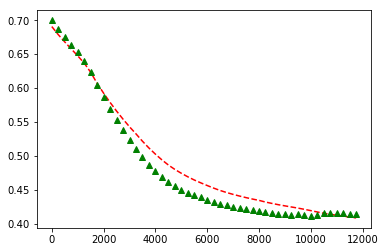

In [20]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

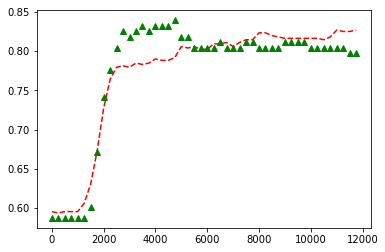

In [21]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()

In [28]:
from sklearn.preprocessing import Binarizer

model = build_neural_network()

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "./titanic.ckpt")
    feed = {
        model.inputs: test_data
    }
    test_predict = sess.run(model.predicted, feed_dict=feed)

binarizer = Binarizer(0.5)

test_predict_result = binarizer.fit_transform(test_predict)
test_predict_result[:10]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.], dtype=float32)

In [43]:
passenger_id = test_passenger_id.copy()

In [66]:
evaluation = passenger_id.to_frame("PassengerId")
evaluation["Survived"] = pd.Series(test_predict_result.reshape(-1), dtype=np.int32)
evaluation.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [67]:
evaluation.to_csv("./evaluation_submission.csv", index=False)